<h1> Investigating Fandango Movie Ratings </h1>

In 2015, Walt Hickey from FiveThirtyEight published a [popular article](https://fivethirtyeight.com/features/fandango-movies-ratings/) where he presented strong evidence which suggest that Fandango's movie rating system was biased and dishonest. In this project, more recent movie ratings data will be analyze to determine whether there has been any change in Fandango's rating system after Hickey's analysis

<hr>

<center><h2> Import libraries </h2></center>

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<hr>

<center><h2> Loading dataset </h2></center>

We will work with 2 different datasets:
1. The data Walt Hickey collected to analyze the characteristics of Fandango's rating system previous to his analysis. This data is publicly available [on GitHub](https://github.com/fivethirtyeight/data/tree/master/fandango)

2. Another set of data which contains movie ratings for movie released in 2016 and 2017. THis data is also publicly available [on Github](https://github.com/mircealex/Movie_ratings_2016_17)

In [10]:
# Loading the data from Walt Hickey
rPrevious = pd.read_csv(r'fandango_score_comparison.csv')

# Loading the data from 2016-17
rAfter = pd.read_csv(r'movie_ratings_16_17.csv')

Since our goal is to determine whether there has been any change in Fandango's rating system after Hickey's analysis, it is important to analyze first if both of this samples are representative of our population of interest.

From Hickey's article and from the [README.md](https://github.com/fivethirtyeight/data/tree/master/fandango) of the data set's repository, we can see that he used the following sampling criteria:
- The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24, 2015)
- The movie must have had tickets on sale in 2015

On the other hand, the dataset from 2016-17 collected data using the following criterias:
- The movie must have been released in 2016 or later
- The movie must have had a considerable number of votes and reviews (unclear how many from the README.md or from the data)
These conditions can also be found in the [README.md](https://github.com/mircealex/Movie_ratings_2016_17) from the repository

Therefore, given both of conditions used for collecting each dataset, **we can conclude that the samples were clearly not randomly picked (some movies didn't even had a chance to be picked at all - like those having under 30 fan ratings or those without tickets on sale in 2015) and are not representative of our population of interest**

Given the above, we will change our goal to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016

<hr>

<center><h2> Defining popularity </h2></center>

With this new research goal, we have two populations of interest:
- All Fandango's ratings for popular movies released in 2015
- All Fandango's ratings for popular movies released in 2016

We need to be clear about what counts as popular movies. We'll use Hickey's benchmark of 30 fan ratings and count a movie as popular only if it has 30 fan ratings or more on Fandango's website.

However, this definition of popularity gives us a hard time since we do not have any information about number of ratings in the dataset from 2016-17. To check if this dataset has any popular movies (i.e. it is representative of popular movies released in 2016), we will select a sample size of 10 movies and research for the number of ratings in the fandango website ourselves

In [13]:
rAfter.sample(10, random_state=1)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
108,Mechanic: Resurrection,2016,38,5.6,29,41,4.0,1.90,2.80,1.45,2.05,2.0,3.0,1.5,2.0
206,Warcraft,2016,32,7.0,28,71,4.0,1.60,3.50,1.40,3.55,1.5,3.5,1.5,3.5
106,Max Steel,2016,22,4.6,0,38,3.5,1.10,2.30,0.00,1.90,1.0,2.5,0.0,2.0
107,Me Before You,2016,51,7.4,58,73,4.5,2.55,3.70,2.90,3.65,2.5,3.5,3.0,3.5
51,Fantastic Beasts and Where to Find Them,2016,66,7.5,73,81,4.5,3.30,3.75,3.65,4.05,3.5,4.0,3.5,4.0
33,Cell,2016,38,4.3,11,16,3.0,1.90,2.15,0.55,0.80,2.0,2.0,0.5,1.0
59,Genius,2016,56,6.5,51,45,3.5,2.80,3.25,2.55,2.25,3.0,3.0,2.5,2.0
152,Sully,2016,74,7.5,85,85,4.5,3.70,3.75,4.25,4.25,3.5,4.0,4.0,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0
31,Captain America: Civil War,2016,75,7.9,90,89,4.5,3.75,3.95,4.50,4.45,4.0,4.0,4.5,4.5


As of April 2019, these are the fan ratings:
- Mechanic: Ressurection - 2251 ratings
- Warcraft -  7284 ratings
- Max Steel - 495 ratings
- Me Before You - 5274 ratings
- Fantastic Beasts and Where to Find Them - 13502 ratings
- Cell - 18 ratings
- Genius - 127 ratings
- Sully - 11890 ratings
- A Hologram for the King - 501 ratings
- Captain America: Civil War - 35177 ratings

90% of the movies in our sample are popular. This is enough and we move forward with a bit more confidence.

<hr>

<center><h2> Data Manipulation </h2></center>

#### Filtering columns dataset

In [20]:
# Selecting the columns which we want to keep from both datasets
cols_previous = ['FILM', 'Fandango_Stars',
                 'Fandango_Ratingvalue', 'Fandango_votes',
                 'Fandango_Difference']
cols_after = ['movie', 'year', 'fandango']

# Copy datasets
tPrevious = rPrevious.copy()
tAfter = rAfter.copy()

# Filter datasets
tPrevious = tPrevious[cols_previous]
tAfter = tAfter[cols_after]

#### Filtering only movies released in 2015 and 2016

In [21]:
tPrevious['YEAR'] = tPrevious['FILM'].str[-5:-1]
print('Hickeys dataset has movies from', 
      tPrevious['YEAR'].unique(), 'years')

print('Dataset from 2016-17 has movies from', 
      tAfter['year'].unique(), 'years')

Hickeys dataset has movies from ['2015' '2014'] years
Dataset from 2016-17 has movies from [2016 2017] years


In [22]:
# The Hickey's dataset have the release year of the movie in
# the FILM colum
tPrevious = tPrevious[tPrevious['FILM'].str.contains('2015')]
tAfter = tAfter[tAfter['year']==2016]

<hr>

<center><h2> Analysis </h2></center>

#### Comparing the shape of distribution 

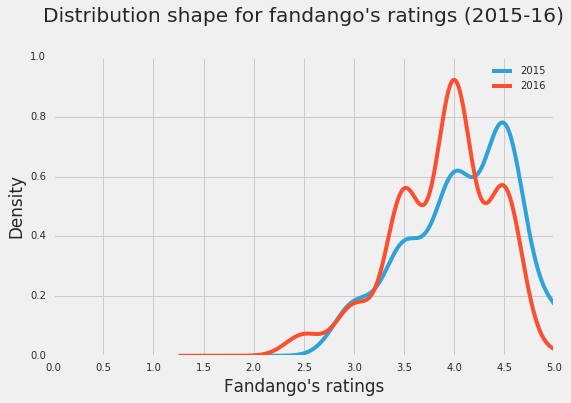

In [40]:
## We will use FiveThirtyEight style for the plots
plt.style.use('fivethirtyeight')

plt.figure(figsize=(8,5))
tPrevious['Fandango_Stars'].plot.kde(label='2015', legend=True)
tAfter['fandango'].plot.kde(label='2016', legend=True)

plt.title("Distribution shape for fandango's ratings (2015-16)",
          y= 1.1)
plt.xlabel("Fandango's ratings")
plt.xticks(np.arange(0,5.1,.5))
plt.xlim(0,5);

From the plot above we can conclude 2 things:
1. Both the shape for movies from 2015 and 2016 are strongly left skewed. This suggests that movies on Fandango are given mostly high and very high fan ratings
2. The curve related to movies from 2016 is a little bit shifted towards the left, when compared to the curve from movies from 2015. This indicates that movie ratings were slightly lower in 2016 compared to 2015

#### Comparing the frequency distributions 

Since the samples have different number of movies, we cannot use absolute frequencies to make a comparison. In addition to that, for better readability, we will use percentages instead of proportions

In [46]:
(tPrevious['Fandango_Stars'].
 value_counts(normalize=True).sort_index()*100)

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [47]:
(tAfter['fandango'].
 value_counts(normalize=True).sort_index()*100)

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

From the frequency tables above we conclude that:
- The ratings for movies from 2016 is indeed lower when compared to the ratings for movies from 2015:
  - The lowest rating in 2016 is 2.5 while in 2015 is 3.0
  - Only 0.5% of the ratings in 2016 received 5 stars, where as in 2015 almost 7% of the ratings were 5 stars
  - The mode (the most frequent rating) in 2016 was 4.0 while in 2015 was 4.5
- Movies from 2016 received more frequent 3.5 stars (24%) when compared to movies from 2015 (18%)

#### Computing statistics

For each one of the datasets we will compute the mean, median and mode and compare these metrics to determine the direction of the difference

In [68]:
# Computing metrics for tPrevious
previous_mean = tPrevious['Fandango_Stars'].mean()
previous_median = tPrevious['Fandango_Stars'].median()
previous_mode = tPrevious['Fandango_Stars'].mode()

# Computing metrics for tAfter
after_mean = tAfter['fandango'].mean()
after_median = tAfter['fandango'].median()
after_mode = tAfter['fandango'].mode()

metrics_2015 = {'mean': previous_mean,
                'median': previous_median,
                'mode': previous_mode}

metrics_2016 = {'mean': after_mean,
                'median': after_median,
                'mode': after_mode}

df_2015 = pd.DataFrame(metrics_2015).T
df_2016 = pd.DataFrame(metrics_2016).T
df_metrics = pd.concat([df_2015, df_2016], axis=1)
df_metrics.columns = ['2015', '2016']

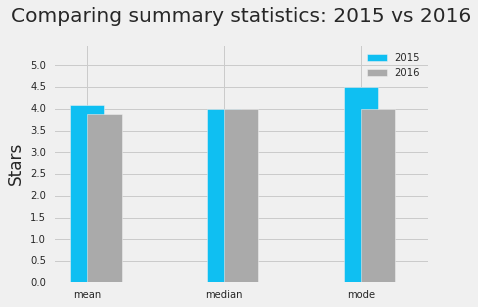

In [85]:
df_metrics['2015'].plot.bar(color = '#0fbff2', align = 'center', 
                            label = '2015', width = .25)
df_metrics['2016'].plot.bar(color = '#aaaaaa', align = 'edge', 
                            label = '2016', width = 0.25, 
                            rot = 0)

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(np.arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper right')
plt.show()

We can conclude that: 
- The mean for 2016 is slightly lower than 2015
- The mode in 2016 is lower than 2015 by 0.5 ratings

<hr>

<center><h2> Conclusion </h2></center>

Our analysis showed that there's indeed a slight reduction of Fandango's rating for popular movies in 2016 when compared to ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015 (as was seen in the kernel density plots, frequency table and metrics bar plots)

<hr>